### Objective:
to generate data of degree 3 polynomial and fit models of degree 1, degree 3 and degree 13 polynomial and compare their performances.

### Tasks:
#### Task 1: Data generation
   - generate 500 samples of the target variable y using the equaton , y=0.5x^3-x^2+2 and add noise

   - Visualize the generated data points

#### Task 2: Polynomial regression (500 samples)
Fit polynomial regression models of the following degree to the generated data:(use polynomial features library from Scikit-learn)

   - Linnear Regression mode(Degree - 1)
   - polynomial Regression model (Degree - 3)
   - Polynomial Regression model (Degree - 13)
   - Compare the estimated model co-efficients to the actual ground truth equations
   - Evaluate the model performance using metrics: MSE , MAE, R^2

Generated data shape: (500, 1) (500, 1)


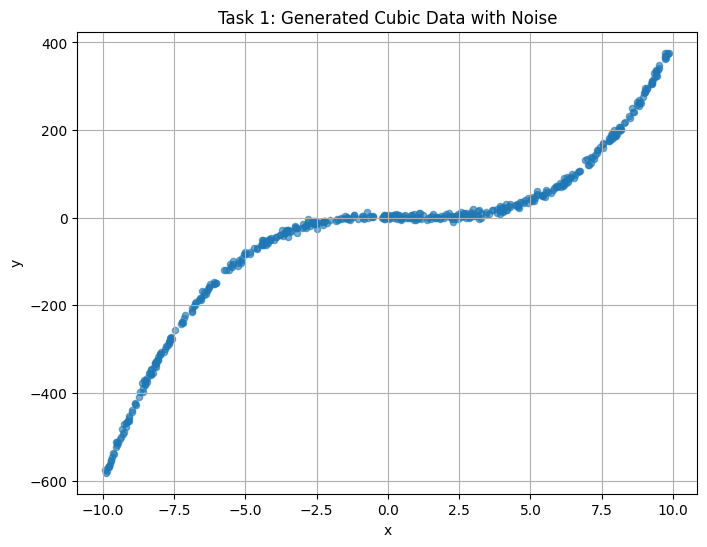

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)


# Generate input data
x = np.random.uniform(-10, 10, 500).reshape(-1, 1)

# Ground truth function
y_true = 0.5 * x**3 - x**2 + 2

# Add Gaussian noise
noise = np.random.normal(0, 5, size=(500, 1))
y = y_true + noise
print("Generated data shape:", x.shape, y.shape)
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x.ravel(), y.ravel(), s=20, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Task 1: Generated Cubic Data with Noise")
plt.grid(True)
plt.show()


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_evaluate_plot(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return model, poly, y_pred, mse, mae, r2


# Train models
model_1, poly_1, y_pred_1, mse_1, mae_1, r2_1 = train_evaluate_plot(x, y, 1)
model_3, poly_3, y_pred_3, mse_3, mae_3, r2_3 = train_evaluate_plot(x, y, 3)
model_13, poly_13, y_pred_13, mse_13, mae_13, r2_13 = train_evaluate_plot(x, y, 13)

# Print metrics
print("Degree 1 (Underfitting)")
print(f"MSE: {mse_1:.2f}, MAE: {mae_1:.2f}, R2: {r2_1:.2f}\n")

print("Degree 3 (Best Fit)")
print(f"MSE: {mse_3:.2f}, MAE: {mae_3:.2f}, R2: {r2_3:.2f}\n")

print("Degree 13 (Overfitting)")
print(f"MSE: {mse_13:.2f}, MAE: {mae_13:.2f}, R2: {r2_13:.2f}")


Degree 1 (Underfitting)
MSE: 6788.96, MAE: 69.33, R2: 0.84

Degree 3 (Best Fit)
MSE: 25.01, MAE: 3.99, R2: 1.00

Degree 13 (Overfitting)
MSE: 24.38, MAE: 3.91, R2: 1.00
